<a href="https://colab.research.google.com/github/rohithp29/Data-Science-Project/blob/main/TASK_6_Time_Series_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error


In [12]:
df = pd.read_csv('/content/Electric_Production.csv')

In [38]:
df.head()

,IPG2211A2N
DATE,
1985-01-01,72.5052
1985-02-01,70.6720
1985-03-01,62.4502
1985-04-01,57.4714
1985-05-01,55.3151


In [39]:
print(df.columns)

Index(['IPG2211A2N'], dtype='object')


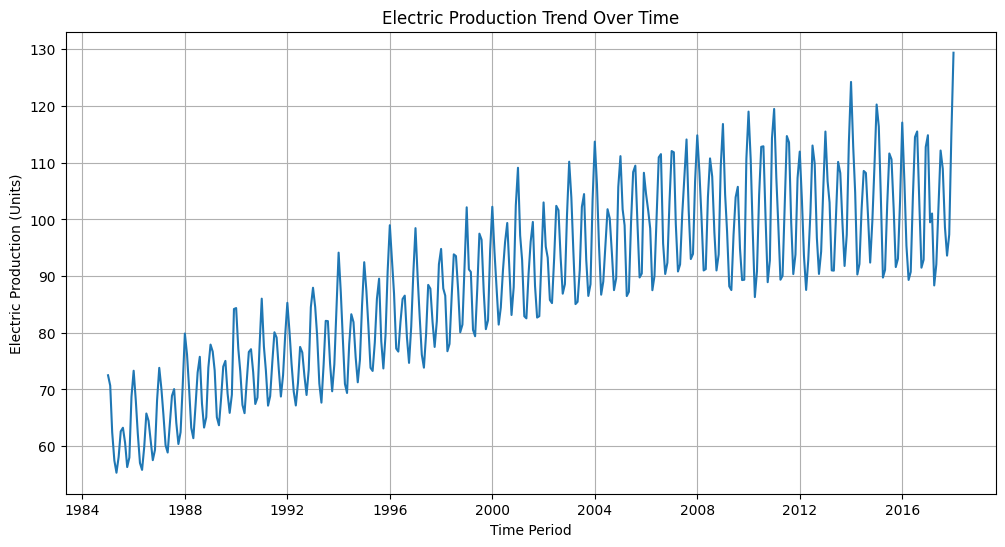

In [42]:
plt.figure(figsize=(12, 6))
plt.plot(df['IPG2211A2N'])
plt.title('Electric Production Trend Over Time')
plt.xlabel('Time Period')
plt.ylabel('Electric Production (Units)')
plt.grid(True)
plt.show()

In [22]:
# Calculate the split point
train_size = int(len(df) * 0.8)  # 80% for training, 20% for testing

# Split the dataset into training and testing sets
train_data, test_data = df['IPG2211A2N'][:train_size], df['IPG2211A2N'][train_size:]

In [23]:
p, d, q = 5, 1, 0
model = ARIMA(train_data, order=(p, d, q))
model_fit = model.fit()

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [24]:
predictions = model_fit.predict(start=len(train_data), end=len(df) - 1)

# 6. Evaluate the model
rmse = np.sqrt(mean_squared_error(test_data, predictions))
print(f'RMSE: {rmse}')

RMSE: 7.499972182685569


In [26]:
forecast_steps = 10
forecast = model_fit.forecast(steps=forecast_steps)
future_dates = pd.date_range(start=df.index[-1], periods=forecast_steps + 1, freq='D')[1:]
forecast_df = pd.DataFrame({'Date': future_dates, 'Forecasted Electric Production': forecast})
print("\nForecasted Electric Production:")
print(forecast_df)


Forecasted Electric Production:
                 Date  Forecasted Electric Production
2011-06-01 2018-01-02                      104.009012
2011-07-01 2018-01-03                      112.267415
2011-08-01 2018-01-04                      109.687603
2011-09-01 2018-01-05                       99.243007
2011-10-01 2018-01-06                       90.547790
2011-11-01 2018-01-07                       92.697959
2011-12-01 2018-01-08                      102.614672
2012-01-01 2018-01-09                      110.270024
2012-02-01 2018-01-10                      108.627341
2012-03-01 2018-01-11                       99.673294


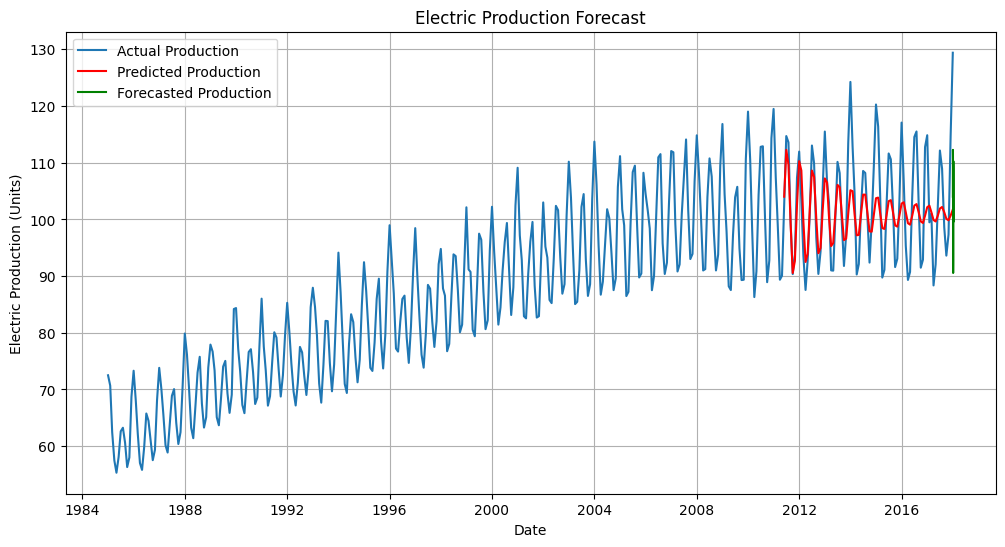

In [41]:
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['IPG2211A2N'], label='Actual Production')
plt.plot(test_data.index, predictions, label='Predicted Production', color='red')
plt.plot(forecast_df['Date'], forecast_df['Forecasted Electric Production'], label='Forecasted Production', color='green')


plt.title('Electric Production Forecast')
plt.xlabel('Date')
plt.ylabel('Electric Production (Units)')
plt.legend()
plt.grid(True)
plt.show()